In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf 
import matplotlib.pyplot as plt
import PIL
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_digit = pd.read_csv('train.csv')
test_digit = pd.read_csv('test.csv')

In [3]:
X_train = data_digit.values[:,1:]
Y_train = data_digit.values[:,0].reshape(42000, 1)

In [4]:
X_test = test_digit.values[:,:]
#Y_test = test_digit.values[:,0].reshape(28000,1)

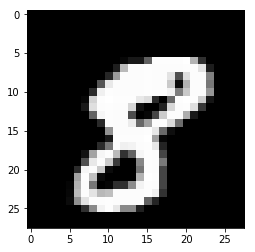

In [5]:
index = 10
plt.imshow(X_train[index].reshape(28,28), cmap = 'gray')

In [6]:
X_train = tf.keras.utils.normalize(X_train.reshape(X_train.shape[0], -1), axis = 0)
X_test = tf.keras.utils.normalize(X_test, axis = 0)

In [7]:
def model():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(120, activation = tf.nn.relu, kernel_initializer = 'normal'))
    model.add(tf.keras.layers.Dense(120, activation = tf.nn.relu, kernel_initializer = 'normal'))
    model.add(tf.keras.layers.Dense(120, activation = tf.nn.relu, kernel_initializer = 'normal'))
    model.add(tf.keras.layers.Dense(120, activation = tf.nn.relu, kernel_initializer = 'normal'))
    model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model

In [8]:
model = model()
model.fit(X_train, Y_train,epochs = 5)

W0822 20:01:27.414482  6840 deprecation.py:506] From C:\Users\kjkr3\Anaconda3\lib\site-packages\tensorflow\python\keras\initializers.py:143: calling RandomNormal.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0822 20:01:27.420504  6840 deprecation.py:506] From C:\Users\kjkr3\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Epoch 1/5
42000/42000 [==============================] - 5s 129us/sample - loss: 0.6866 - acc: 0.7731
Epoch 2/5
42000/42000 [==============================] - 5s 128us/sample - loss: 0.2871 - acc: 0.9135
Epoch 3/5
42000/42000 [==============================] - 5s 116us/sample - loss: 0.1996 - acc: 0.9407
Epoch 4/5
42000/42000 [==============================] - 5s 118us/sample - loss: 0.1497 - acc: 0.9539s - loss: 0.1501 
Epoch 5/5
42000/42000 [==============================] - 6s 135us/sample - loss: 0.1198 - acc: 0.9630


In [9]:
predict = model.predict([X_test])

In [10]:
list_pred = [np.argmax(prob) for prob in predict]

Model's Output = 3


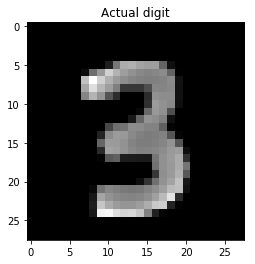

In [11]:
index = 1005
plt.imshow(X_test[index].reshape(28,28), cmap = 'gray')
plt.title("Actual digit")
print("Model's Output = {0}".format(list_pred[index]))